## PyTorch Flow

In [180]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Data Preparing and Loading

In [181]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[: 10], y[: 10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## Spliting Dataset

In [182]:
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [183]:
X.shape

torch.Size([50, 1])

## Visualize

In [184]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=10, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=10, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=10, label="Predictions")
    plt.legend(prop={"size":14});

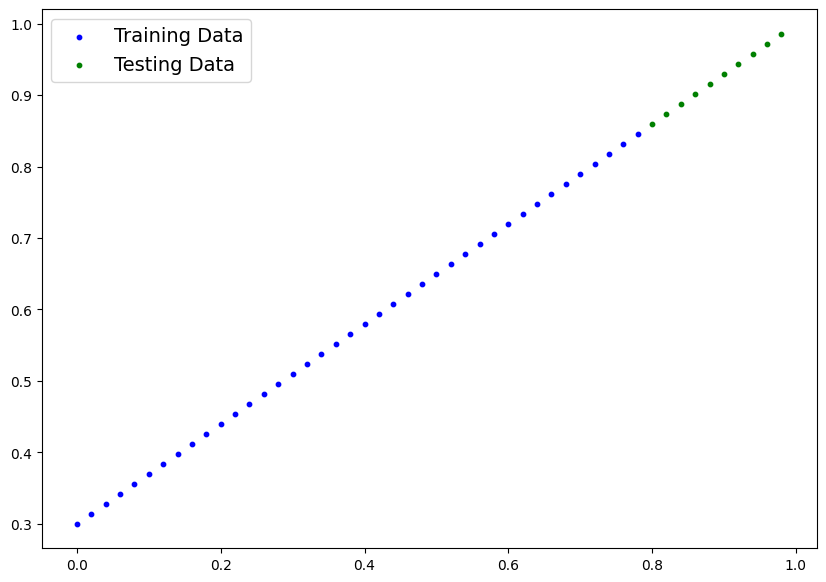

In [185]:
plot_predictions()

## Build The **Model**

In [186]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [187]:
torch.manual_seed(41)

model_0 = LinearRegressionModel()
model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.2364], requires_grad=True),
 Parameter containing:
 tensor([0.2266], requires_grad=True)]

In [188]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2364])), ('bias', tensor([0.2266]))])

In [189]:
y_test, X_test

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

In [190]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.4158],
        [0.4205],
        [0.4252],
        [0.4300],
        [0.4347],
        [0.4394],
        [0.4441],
        [0.4489],
        [0.4536],
        [0.4583]])

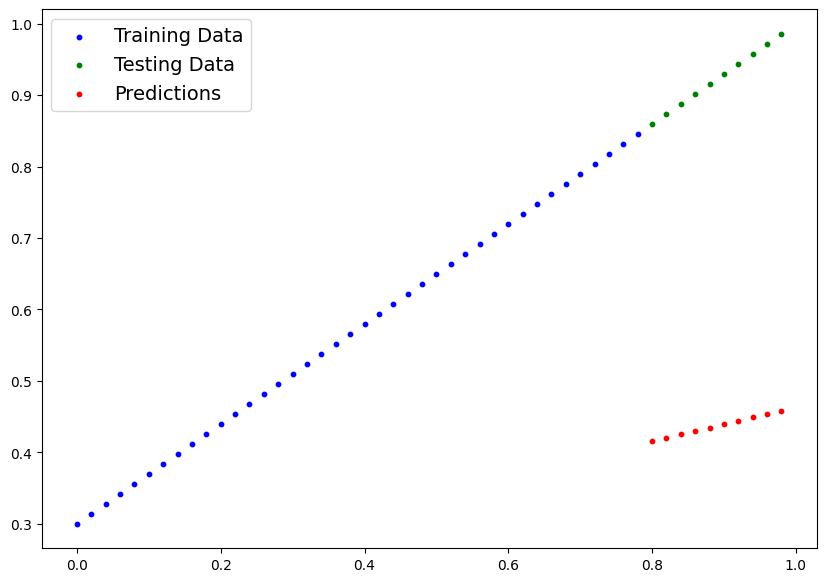

In [191]:
plot_predictions(predictions=y_preds)

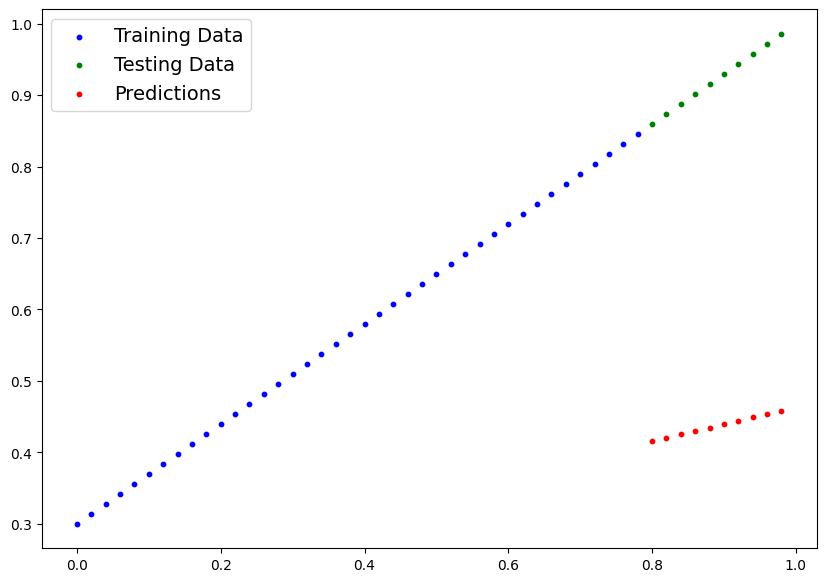

In [192]:
plot_predictions(predictions=y_preds)

In [193]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [194]:
epochs = 200

epoch_counts = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
    model_0.train()

    y_preds = model_0(X_train)

    loss = loss_fn(y_preds, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
            epoch_counts.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch =  {epoch} | Loss = {loss} | Test Loss = {test_loss}")
            print(model_0.state_dict())

Epoch =  0 | Loss = 0.25416791439056396 | Test Loss = 0.47247371077537537
OrderedDict([('weights', tensor([0.2403])), ('bias', tensor([0.2366]))])
Epoch =  10 | Loss = 0.14295586943626404 | Test Loss = 0.34079939126968384
OrderedDict([('weights', tensor([0.2793])), ('bias', tensor([0.3336]))])
Epoch =  20 | Loss = 0.09056319296360016 | Test Loss = 0.25058868527412415
OrderedDict([('weights', tensor([0.3149])), ('bias', tensor([0.3921]))])
Epoch =  30 | Loss = 0.07367391139268875 | Test Loss = 0.1990634649991989
OrderedDict([('weights', tensor([0.3436])), ('bias', tensor([0.4181]))])
Epoch =  40 | Loss = 0.06715407967567444 | Test Loss = 0.16996896266937256
OrderedDict([('weights', tensor([0.3668])), ('bias', tensor([0.4266]))])
Epoch =  50 | Loss = 0.06307655572891235 | Test Loss = 0.15285582840442657
OrderedDict([('weights', tensor([0.3865])), ('bias', tensor([0.4261]))])
Epoch =  60 | Loss = 0.059586554765701294 | Test Loss = 0.1418357640504837
OrderedDict([('weights', tensor([0.4045

In [195]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6430])), ('bias', tensor([0.3236]))])

In [196]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6430])), ('bias', tensor([0.3236]))])

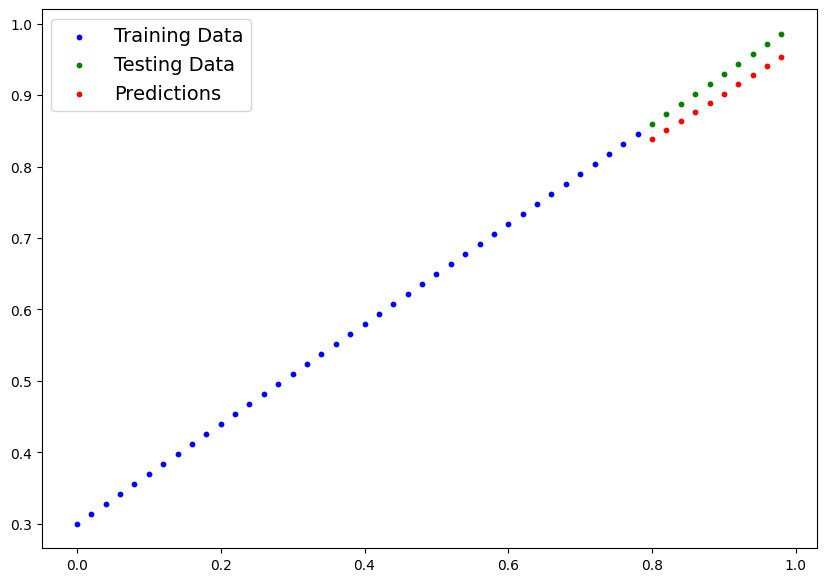

In [197]:
plot_predictions(predictions=test_pred)

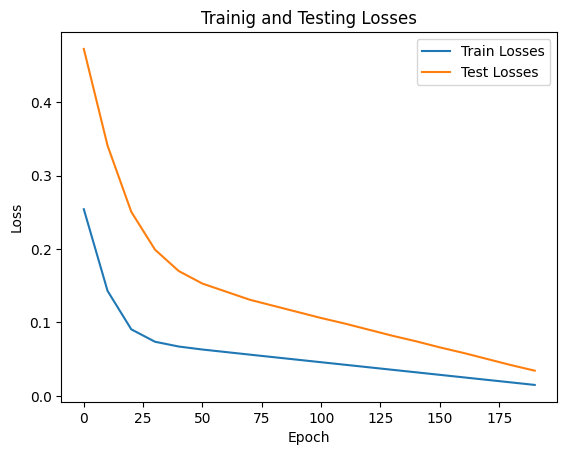

In [201]:
plt.plot(epoch_counts, torch.tensor(loss_values).numpy(), label="Train Losses")
plt.plot(epoch_counts, torch.tensor(test_loss_values).numpy(), label="Test Losses")
plt.title("Trainig and Testing Losses")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [203]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth


In [206]:
## Load the saved model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [207]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6430])), ('bias', tensor([0.3236]))])

In [208]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8380],
        [0.8509],
        [0.8637],
        [0.8766],
        [0.8894],
        [0.9023],
        [0.9152],
        [0.9280],
        [0.9409],
        [0.9537]])

In [212]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8380],
        [0.8509],
        [0.8637],
        [0.8766],
        [0.8894],
        [0.9023],
        [0.9152],
        [0.9280],
        [0.9409],
        [0.9537]])

In [214]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [215]:
### Agnostic device code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device is: {device}")

Device is: cpu
